Task1: Load the Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

gdp_df = pd.read_csv('gdp_pcap.csv')
life_df = pd.read_csv('life expectancy.csv')
pop_df = pd.read_csv('population.csv')

Task2: Merge the Data

In [5]:
def reshape_data(df, value_name):
    # 'country' is the identifier, the rest of the columns are years
    return pd.melt(df, id_vars=['country'], var_name='year', value_name=value_name)

gdp_long = reshape_data(gdp_df, 'gdp_pcap')
life_long = reshape_data(life_df, 'life_expectancy')
pop_long = reshape_data(pop_df, 'population')

df = pd.merge(gdp_long, life_long, on=['country', 'year'], how='outer')
df = pd.merge(df, pop_long, on=['country', 'year'], how='outer')

Task3: Prepare the Data

In [6]:
def clean_currency(x):
    if pd.isna(x):
        return None
    if isinstance(x, (int, float)):
        return float(x)
    if isinstance(x, str):
        x = x.strip()
        factor = 1
        if 'k' in x: factor = 1e3
        elif 'M' in x: factor = 1e6
        elif 'B' in x: factor = 1e9
        return float(x.replace('k', '').replace('M', '').replace('B', '')) * factor
    return x

In [7]:
df['gdp_pcap'] = df['gdp_pcap'].apply(clean_currency)
df['population'] = df['population'].apply(clean_currency)

In [8]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df.rename(columns={'population': 'Population'}, inplace=True)
df.dropna(subset=['year', 'gdp_pcap', 'life_expectancy', 'Population'], inplace=True)

Task4: Explore the Data

In [9]:
print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Last 5 Rows ---")
print(df.tail())

print(f"\nNumber of unique countries: {df['country'].nunique()}")


--- First 5 Rows ---
       country  year  gdp_pcap  life_expectancy  Population
0  Afghanistan  1800     599.0             28.2   3280000.0
1  Afghanistan  1801     599.0             28.2   3280000.0
2  Afghanistan  1802     599.0             28.2   3280000.0
3  Afghanistan  1803     599.0             28.2   3280000.0
4  Afghanistan  1804     599.0             28.2   3280000.0

--- Last 5 Rows ---
        country  year  gdp_pcap  life_expectancy  Population
59292  Zimbabwe  2096   10800.0             73.9  35500000.0
59293  Zimbabwe  2097   11000.0             74.0  35500000.0
59294  Zimbabwe  2098   11300.0             74.2  35600000.0
59295  Zimbabwe  2099   11600.0             74.3  35600000.0
59296  Zimbabwe  2100   11900.0             74.4  35600000.0

Number of unique countries: 195


In [10]:
df_2000 = df[df['year'] == 2000].copy()
print(f"Rows in year 2000 dataset: {len(df_2000)}")

Rows in year 2000 dataset: 195


Task5: Filter Data
Original files didn't include continent, I had AI prepare this dictionary so I can append it to the data.

In [11]:
continent_map = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'Angola': 'Africa',
    'Argentina': 'South America', 'Australia': 'Oceania', 'Austria': 'Europe', 'Bangladesh': 'Asia',
    'Belgium': 'Europe', 'Bolivia': 'South America', 'Botswana': 'Africa', 'Brazil': 'South America',
    'Bulgaria': 'Europe', 'Cambodia': 'Asia', 'Cameroon': 'Africa', 'Canada': 'North America',
    'Chile': 'South America', 'China': 'Asia', 'Colombia': 'South America', 'Congo, Dem. Rep.': 'Africa',
    'Congo, Rep.': 'Africa', 'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cuba': 'North America',
    'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Dominican Republic': 'North America',
    'Ecuador': 'South America', 'Egypt': 'Africa', 'El Salvador': 'North America', 'Ethiopia': 'Africa',
    'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Ghana': 'Africa', 'Greece': 'Europe',
    'Guatemala': 'North America', 'Haiti': 'North America', 'Honduras': 'North America', 'Hungary': 'Europe',
    'India': 'Asia', 'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 'Ireland': 'Europe',
    'Israel': 'Asia', 'Italy': 'Europe', 'Jamaica': 'North America', 'Japan': 'Asia', 'Jordan': 'Asia',
    'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kuwait': 'Asia', 'Lebanon': 'Asia', 'Libya': 'Africa',
    'Malaysia': 'Asia', 'Mali': 'Africa', 'Mexico': 'North America', 'Mongolia': 'Asia',
    'Morocco': 'Africa', 'Mozambique': 'Africa', 'Myanmar': 'Asia', 'Namibia': 'Africa',
    'Nepal': 'Asia', 'Netherlands': 'Europe', 'New Zealand': 'Oceania', 'Nicaragua': 'North America',
    'Nigeria': 'Africa', 'North Korea': 'Asia', 'Norway': 'Europe', 'Pakistan': 'Asia',
    'Panama': 'North America', 'Paraguay': 'South America', 'Peru': 'South America',
    'Philippines': 'Asia', 'Poland': 'Europe', 'Portugal': 'Europe', 'Romania': 'Europe',
    'Russia': 'Europe', 'Rwanda': 'Africa', 'Saudi Arabia': 'Asia', 'Senegal': 'Africa',
    'Serbia': 'Europe', 'Singapore': 'Asia', 'Slovakia': 'Europe', 'Somalia': 'Africa',
    'South Africa': 'Africa', 'South Korea': 'Asia', 'Spain': 'Europe', 'Sri Lanka': 'Asia',
    'Sudan': 'Africa', 'Sweden': 'Europe', 'Switzerland': 'Europe', 'Syria': 'Asia',
    'Taiwan': 'Asia', 'Tanzania': 'Africa', 'Thailand': 'Asia', 'Tunisia': 'Africa',
    'Turkey': 'Asia', 'Uganda': 'Africa', 'Ukraine': 'Europe', 'UAE': 'Asia',
    'United Kingdom': 'Europe', 'United States': 'North America', 'Uruguay': 'South America',
    'Uzbekistan': 'Asia', 'Venezuela': 'South America', 'Vietnam': 'Asia', 'Yemen': 'Asia',
    'Zambia': 'Africa', 'Zimbabwe': 'Africa', 'Cote d\'Ivoire': 'Africa', "Cape Verde": "Africa",
    "Hong Kong, China": "Asia", "Kyrgyz Republic": "Asia", "Lao": "Asia", "St. Lucia": "North America",
    "Moldova": "Europe", "Palestine": "Asia", "Slovak Republic": "Europe", "Turkmenistan": "Asia",
    "St. Vincent and the Grenadines": "North America", "St. Kitts and Nevis": "North America"
}
df['continent'] = df['country'].map(continent_map)
df['continent'] = df['continent'].fillna('Other')

In [12]:
df_africa = df[df['continent'] == 'Africa'].copy()

df_africa_filtered = df_africa[df_africa['Population'] >= 1000000]
print(f"\nAfrican entries with Pop > 1M: {len(df_africa_filtered)}")


African entries with Pop > 1M: 7260


Task6: Organize the Data

In [13]:
df_sorted = df.sort_values(by='life_expectancy', ascending=True)

def categorize_population(pop):
    if pop < 10000000: 
        return 'Low'
    elif pop < 50000000: 
        return 'Medium'
    else: 
        return 'High'

df['pop_category'] = df['Population'].apply(categorize_population)
print("\n--- Population Categorization Sample ---")
print(df[['country', 'year', 'Population', 'pop_category']].head())


--- Population Categorization Sample ---
       country  year  Population pop_category
0  Afghanistan  1800   3280000.0          Low
1  Afghanistan  1801   3280000.0          Low
2  Afghanistan  1802   3280000.0          Low
3  Afghanistan  1803   3280000.0          Low
4  Afghanistan  1804   3280000.0          Low


Task7: Basic Analysis

In [14]:
print("\n--- Average GDP per Capita by Continent ---")
print(df.groupby('continent')['gdp_pcap'].mean())

max_life_idx = df_2000['life_expectancy'].idxmax()
highest_life_country = df_2000.loc[max_life_idx]
print(f"\nCountry with highest life expectancy in 2000: {highest_life_country['country']} ({highest_life_country['life_expectancy']} years)")


--- Average GDP per Capita by Continent ---
continent
Africa            5520.709777
Asia             13462.026840
Europe           23645.371847
North America    11751.650560
Oceania          28286.229236
Other            12589.388575
South America    12589.472757
Name: gdp_pcap, dtype: float64

Country with highest life expectancy in 2000: Japan (81.6 years)


Task8: Visualization

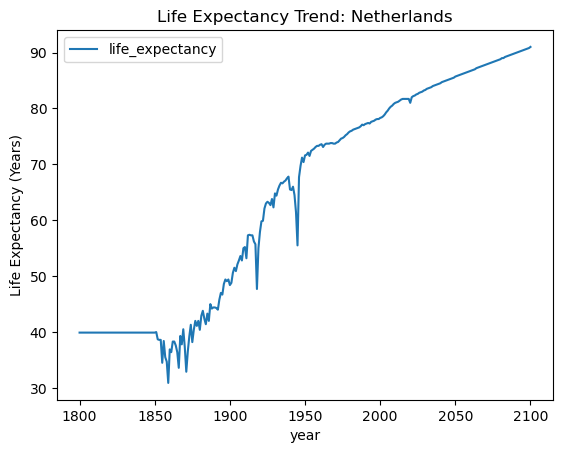

In [17]:
country_name = 'Netherlands'
df_vis = df[df['country'] == country_name].sort_values('year')

df_vis.plot(x='year', y='life_expectancy', kind='line', title=f'Life Expectancy Trend: {country_name}')
plt.ylabel('Life Expectancy (Years)')
plt.show()